### Regression Analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
file_path = r"C:\Users\xuefe\Desktop\Team Project 2\data\processed\cleaned_data1.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Head:")
print(data.head())
print("\nColumns in Dataset:")
print(data.columns)

# Prepare the data for regression
grouped_data = data.groupby(['OCC_DAY', 'OCC_HOUR']).size().reset_index(name='Incidents')

# Defining features (X) and target (y)
X = grouped_data[['OCC_DAY', 'OCC_HOUR']]
y = grouped_data['Incidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Dataset Head:
   OCC_YEAR  OCC_DAY  OCC_DOY  OCC_HOUR  LONG_WGS84  LAT_WGS84  \
0    2013.0     31.0    365.0        17  -79.306754  43.734654   
1    2014.0      1.0      1.0        15  -79.236119  43.721827   
2    2013.0     25.0    359.0         0  -79.529692  43.618988   
3    2014.0      2.0      2.0         9  -79.313796  43.688101   
4    2014.0      2.0      2.0         1  -79.273925  43.813557   

   OCC_MONTH_April  OCC_MONTH_August  OCC_MONTH_December  OCC_MONTH_February  \
0            False             False                True               False   
1            False             False               False               False   
2            False             False                True               False   
3            False             False               False               False   
4            False             False               False               False   

   ...  NEIGHBOURHOOD_158_Woburn North (142)  \
0  ...                                 False   
1  ...      

In [27]:
# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict and evaluate
y_poly_pred = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_poly_pred)
print(f"Polynomial Regression Mean Squared Error: {poly_mse}")


Polynomial Regression Mean Squared Error: 302.8075075503879


#Polynomial features are created from the existing OCC_DAY and OCC_HOUR using a degree of 2. This allows the model to capture nonlinear relationships in the data.
#An MSE of 302.81 suggests that, on average, the square of the difference between the predicted and actual number of incidents is 302.81

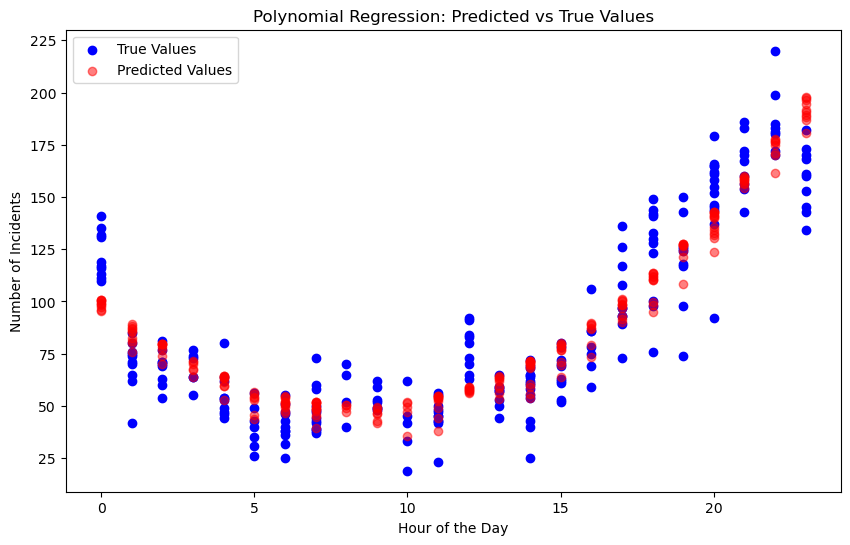

In [30]:
# Visualization: Polynomial Regression Results
plt.figure(figsize=(10, 6))

# Plot the true values
plt.scatter(X_test['OCC_HOUR'], y_test, color='blue', label='True Values')

# Plot the predicted values
plt.scatter(X_test['OCC_HOUR'], y_poly_pred, color='red', label='Predicted Values', alpha=0.5)

plt.title('Polynomial Regression: Predicted vs True Values')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()


The relationship modeled by the polynomial regression shows that the frequency of auto theft incidents varies with the hour of the day in a nonlinear manner. The model effectively captures the general trend of incidents being higher during certain hours and lower during others. This relationship can help guide the allocation of police resources to times when auto theft is more likely to occur, thereby improving the efficiency and effectiveness of crime prevention efforts

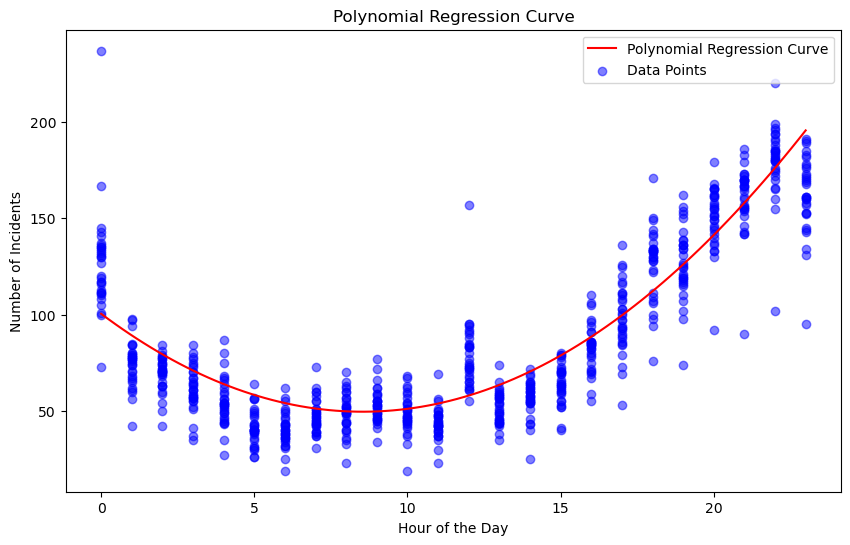

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Polynomial Regression Curve
plt.figure(figsize=(10, 6))

# Create a smooth curve for visualization
X_smooth = np.linspace(X['OCC_HOUR'].min(), X['OCC_HOUR'].max(), 100).reshape(-1, 1)

# Since PolynomialFeatures was fitted with named columns, we will use DataFrame for consistency
# For the mean OCC_DAY
mean_occ_day = np.full_like(X_smooth, X['OCC_DAY'].mean())

# Combine OCC_DAY and OCC_HOUR
X_smooth_full = np.hstack((mean_occ_day, X_smooth))

# Convert it back to DataFrame with proper column names
X_smooth_full_df = pd.DataFrame(X_smooth_full, columns=['OCC_DAY', 'OCC_HOUR'])

# Transform using PolynomialFeatures
X_smooth_poly = poly.transform(X_smooth_full_df)

# Predict using the model
y_smooth_pred = poly_model.predict(X_smooth_poly)

# Plot the smooth polynomial regression curve
plt.plot(X_smooth, y_smooth_pred, color='red', label='Polynomial Regression Curve')
plt.scatter(X['OCC_HOUR'], y, color='blue', alpha=0.5, label='Data Points')

plt.title('Polynomial Regression Curve')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()




Effectiveness of the Model: The polynomial regression model effectively captures the nonlinear relationship between the hour of the day and the number of incidents. It provides valuable insights into the patterns of auto theft incidents, particularly highlighting the times of day when incidents are most and least likely to occur.

Potential Improvements: While the model is effective in capturing the general trend, the scattered nature of some data points suggests that there may be other factors influencing the number of incidents that are not accounted for in this model. Further refinement, such as incorporating additional variables (e.g., day of the week, weather conditions), could improve the model's accuracy.

Analyst:

Early Morning Hours (0:00 - 6:00 AM):
The number of incidents starts relatively high around midnight and then gradually decreases through the early morning hours. This pattern suggests that auto theft is initially frequent late at night but becomes less common as the morning progresses.
The higher frequency of incidents around midnight could be attributed to fewer people being active or vigilant during these hours, making it easier for thieves to operate.

Midday Hours (6:00 AM - 12:00 PM):

The regression curve shows a downward trend, reaching its lowest point during these hours. This indicates that auto thefts are least likely to occur in the late morning and around noon.
This lower frequency might be due to increased daytime activities, with more people around, reducing opportunities for theft.

Afternoon to Evening Hours (12:00 PM - 6:00 PM):

After the midday low, the number of incidents begins to increase again in the afternoon and continues to rise into the evening.
This could be related to vehicles being parked for longer periods as people return home from work, providing more opportunities for theft.

Evening to Late Night (6:00 PM - 12:00 AM):

The curve shows a significant rise in incidents during the evening hours, peaking late at night.
This period likely represents a high-risk time for auto theft, as darkness and decreased public activity provide cover for thieves.

Peak Hours:

The hours between 6:00 PM and midnight are critical times when the likelihood of auto theft is highest. Law enforcement should consider allocating more resources, such as increased patrolling or surveillance, during these hours to deter potential thieves.

Low-Risk Hours:

The hours between 6:00 AM and 12:00 PM represent a period of lower risk for auto theft. During these times, resources might be allocated to other activities or areas requiring attention.

Conclusion:

The analysis of the hour of the day in relation to auto theft incidents highlights a clear pattern of increased risk during late-night and early-morning hours, with a significant dip during the middle of the day. This understanding is crucial for optimizing the allocation of law enforcement resources to effectively reduce the occurrence of auto theft. By focusing efforts during the identified peak hours, police services can improve their efficiency in preventing and responding to these crimes. 